### Interpretation

* If we want to reduce False Negative(actually Fraud but predicted as legit) we should increase the value of contamination in Isolation tree and False Positive value also increases with contamination 
* If we don't care about False Positive... we only cared about False Negative...means we can increase the contamination values

In [56]:
import pandas as pd
import numpy as np
from metrics import clf_metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import RandomUnderSampler

In [60]:
cc = pd.read_csv("creditcard.csv")

In [61]:
legit = cc[cc['Class'] == 0]
fraud = cc[cc['Class'] == 1]

In [62]:
X = cc.drop('Class',axis = 1)
y = cc['Class']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size=0.2,random_state=42)

In [64]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [65]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

#### UnderSampling

In [66]:
us = RandomUnderSampler(sampling_strategy=0.004925)# undersampling the data with this ratio(394:80,000)

In [67]:
re_X_train,re_y_train = us.fit_resample(X_train,y_train)

In [109]:
re_y_train.value_counts()

0    80000
1      394
Name: Class, dtype: int64

## Isolation Tree Model

In [190]:
ift = IsolationForest(contamination=0.0085)

In [191]:
ift.fit(re_X_train,re_y_train)

IsolationForest(contamination=0.0085)

In [194]:
ift_predicted = ift.predict(X_test)

In [195]:
ift_predicted 
# here 1  is normal values ("means legit transaction : 0")
# -1 - outliers ("means fraud : 0")

array([-1,  1,  1, ...,  1,  1,  1])

In [192]:
data_test = X_test.copy()

In [193]:
data_test['Class'] = y_test

In [196]:
data_test['Predicted_Class'] = ift_predicted

In [197]:
data_test['Predicted_Class'] = data_test['Predicted_Class'].map({-1:1,1:0})

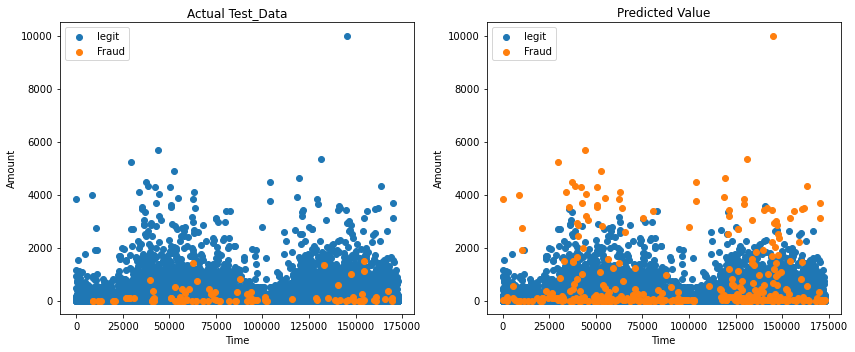

In [198]:
fig,ax = plt.subplots(figsize = (12,5),nrows=1,ncols = 2)

ax[0].scatter(x = data_test[data_test['Class'] == 0]['Time'],y = data_test[data_test['Class'] == 0]['Amount']
              ,label = 'legit')
ax[0].scatter(x = data_test[data_test['Class'] == 1]['Time'],y = data_test[data_test['Class'] == 1]['Amount'],
             label = 'Fraud')

ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amount")

ax[0].set_title("Actual Test_Data")
ax[0].legend()

ax[1].scatter(x = data_test[data_test['Predicted_Class'] == 0]['Time'],
              y = data_test[data_test['Predicted_Class'] == 0]['Amount'],label = 'legit')
ax[1].scatter(x = data_test[data_test['Predicted_Class'] == 1]['Time'],
              y = data_test[data_test['Predicted_Class'] == 1]['Amount'],label = 'Fraud')

ax[1].set_xlabel("Time")
ax[1].set_ylabel("Amount")

ax[1].set_title("Predicted Value")
ax[1].legend()

plt.tight_layout()

In [200]:
# here False Positves are high #bcz of outlier detection...

In [199]:
clf_metrics(y_test,data_test['Predicted_Class'].values)


confusion_matrix :  [[56511   353]
 [   41    57]]


fbeta_score :  0.22440944881889766


recall_score :  0.5816326530612245


classification_report : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.58      0.22        98

    accuracy                           0.99     56962
   macro avg       0.57      0.79      0.61     56962
weighted avg       1.00      0.99      1.00     56962



accuracy_score :  0.9930831080369369


